In [2]:
source("../../functions.R")

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
files = list.files()
files = files[grep(x = files, pattern = 'matrix')]
files

[1] "GSM4653855_AD1_matrix.mtx"  "GSM4653856_AD2_matrix.mtx" 
 [3] "GSM4653857_AD3_matrix.mtx"  "GSM4653858_AD4_matrix.mtx" 
 [5] "GSM4653859_AD5_matrix.mtx"  "GSM4653860_AD6_matrix.mtx" 
 [7] "GSM4653861_AD7_matrix.mtx"  "GSM4653862_AD8_matrix.mtx" 
 [9] "GSM4653863_HC1_matrix.mtx"  "GSM4653864_HC2_matrix.mtx" 
[11] "GSM4653865_HC3_matrix.mtx"  "GSM4653866_HC4_matrix.mtx" 
[13] "GSM4653867_HC5_matrix.mtx"  "GSM4653868_HC6_matrix.mtx" 
[15] "GSM4653869_HC7_matrix.mtx"  "GSM4800170_AD10_matrix.mtx"
[17] "GSM4800171_AD11_matrix.mtx" "GSM4800172_AD12_matrix.mtx"
[19] "GSM4800173_AD13_matrix.mtx" "GSM4800174_AD14_matrix.mtx"
[21] "GSM4800175_AD15_matrix.mtx" "GSM4800176_AD16_matrix.mtx"
[23] "GSM4800177_AD17_matrix.mtx" "GSM4800178_AD18_matrix.mtx"
[25] "GSM4800179_AD19_matrix.mtx"

In [34]:
# read in all data and create seurat object
for (samp in sampNames) {
    message(samp)
    dir.create(samp)
    system(paste0('cp *', samp, '_* ', samp))
    dir_files = list.files(samp)
    file.rename(paste0(samp, '/', dir_files[1]), paste0(samp, '/', 'barcodes.tsv'))
    file.rename(paste0(samp, '/', dir_files[2]), paste0(samp, '/','genes.tsv'))
    file.rename(paste0(samp, '/', dir_files[3]), paste0(samp, '/', 'matrix.mtx'))
    matrix_curr = Read10X(samp)
    seurat_curr = CreateSeuratObject(matrix_curr)
    seurat_curr@meta.data$samp = samp
    seurat_curr = RenameCells(seurat_curr, add.cell.id = samp)
    if(samp == sampNames[1]) {
        seurat = seurat_curr
    }
    else{
        seurat = MergeSeurat(seurat, seurat_curr)
    }
}

AD1

AD2

AD3

AD4

AD5

AD6

AD7

AD8

HC1

HC2

HC3

HC4

HC5

HC6

HC7

AD10

AD11

AD12

AD13

AD14

AD15

AD16

AD17

AD18

AD19



In [2]:
# process seurat object
seurat@meta.data$n_genes = seurat@meta.data$nGene
seurat = seuratProcess(seurat)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.5.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix
Warning message:
"package 'feather' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: viridisLite
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Attaching package: 'tidyr'

The following object


Time Elapsed:  7.36584748427073 mins

Scaling data matrix


In [3]:
seurat = FindClusters(seurat, dims.use = 1:15, resolution = .2, print.output = FALSE)

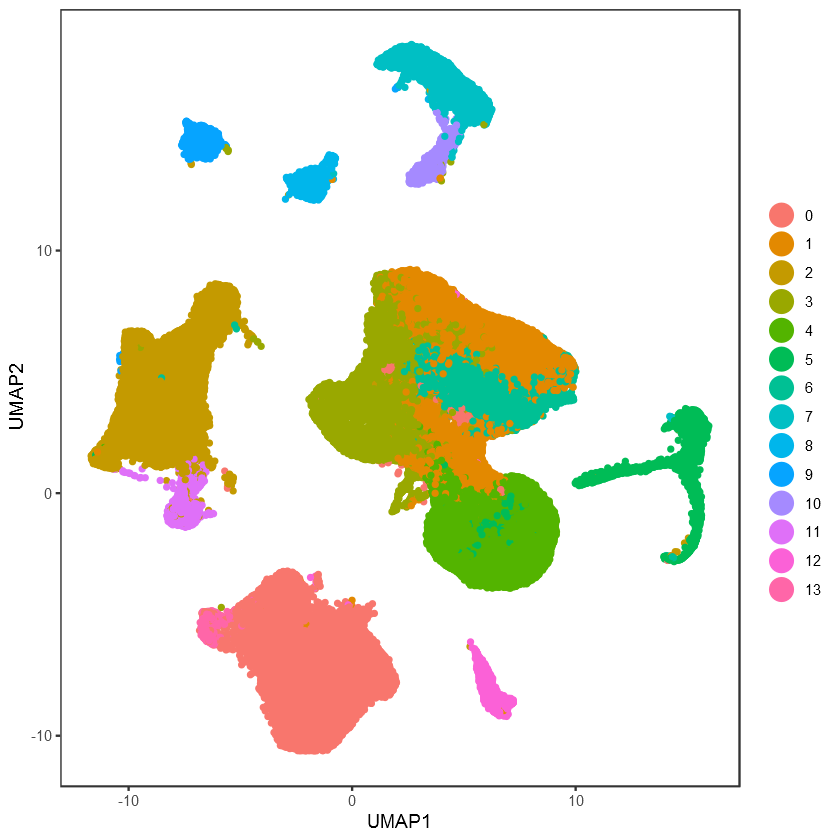

In [4]:
DimPlot(seurat, 'umap')

In [5]:
tcells = SubsetData(seurat, WhichCells(seurat, 0, 13))
tcells = pyProcess(tcells)

Regressing out: n_genes



Time Elapsed:  1.63961056470871 mins

Scaling data matrix


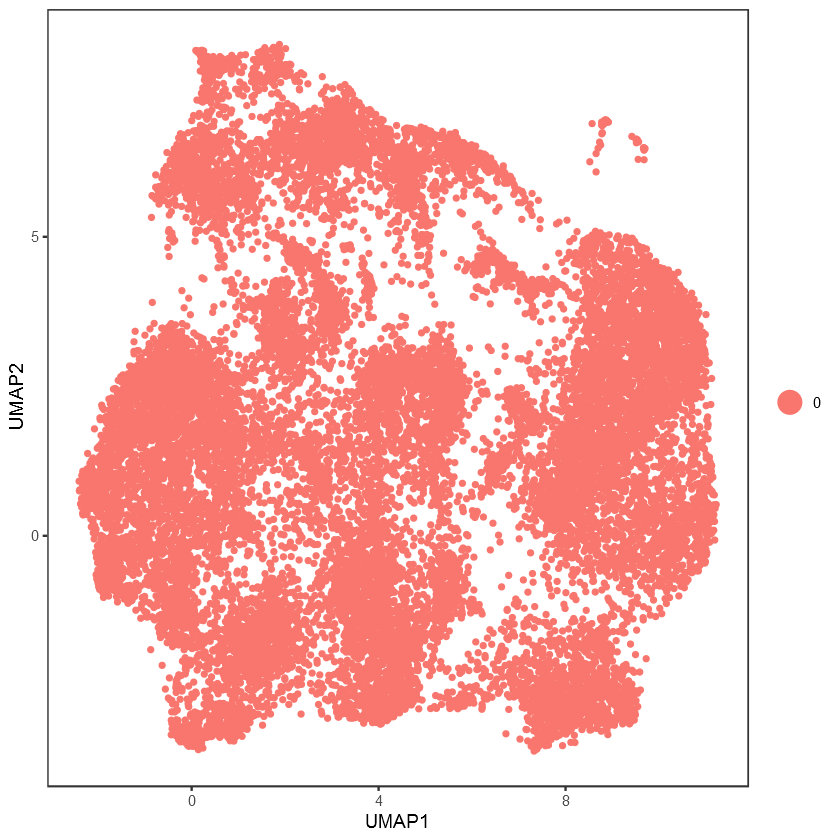

In [6]:
DimPlot(tcells, 'umap')

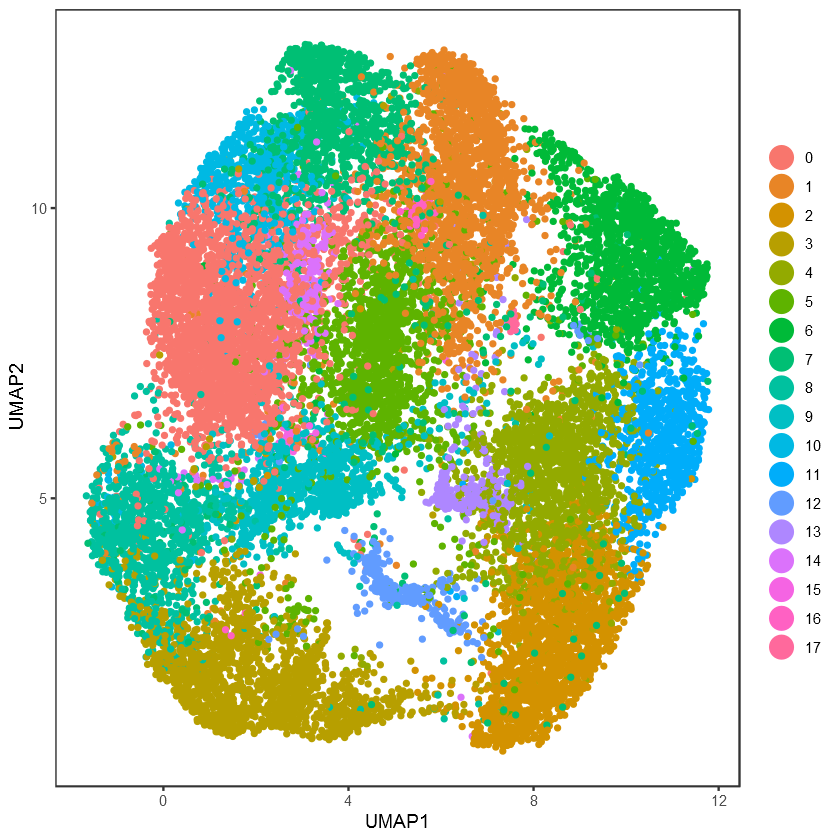

In [9]:
tcells = FindClusters(tcells, dims.use = 1:10, resolution = .8, print.output = FALSE)
tcells = RunUMAP(tcells, dims.use = 1:10)
DimPlot(tcells, 'umap')

In [10]:
tcells_sub = SubsetData(tcells, tcells@cell.names[tcells@meta.data$samp %in% c("AD1", 'AD2', 'AD3', 'AD4', 'AD5', "AD6", 'AD7', "AD8")])

Regressing out: n_genes



Time Elapsed:  1.67126168409983 mins

Scaling data matrix


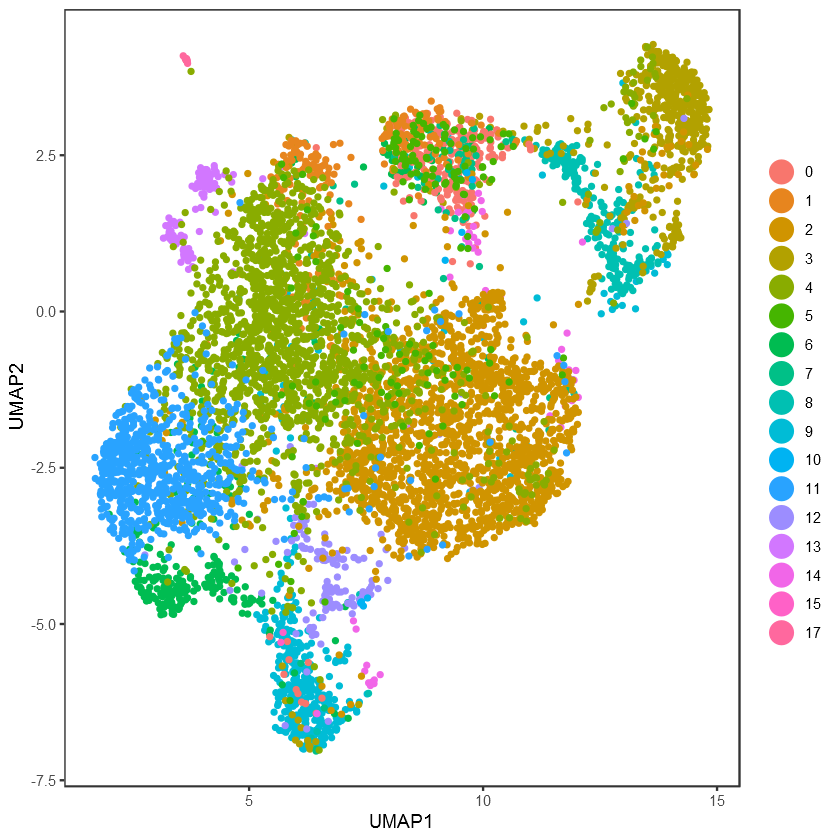

In [11]:
tcells_sub = seuratProcess(tcells_sub)
DimPlot(tcells_sub, 'umap')

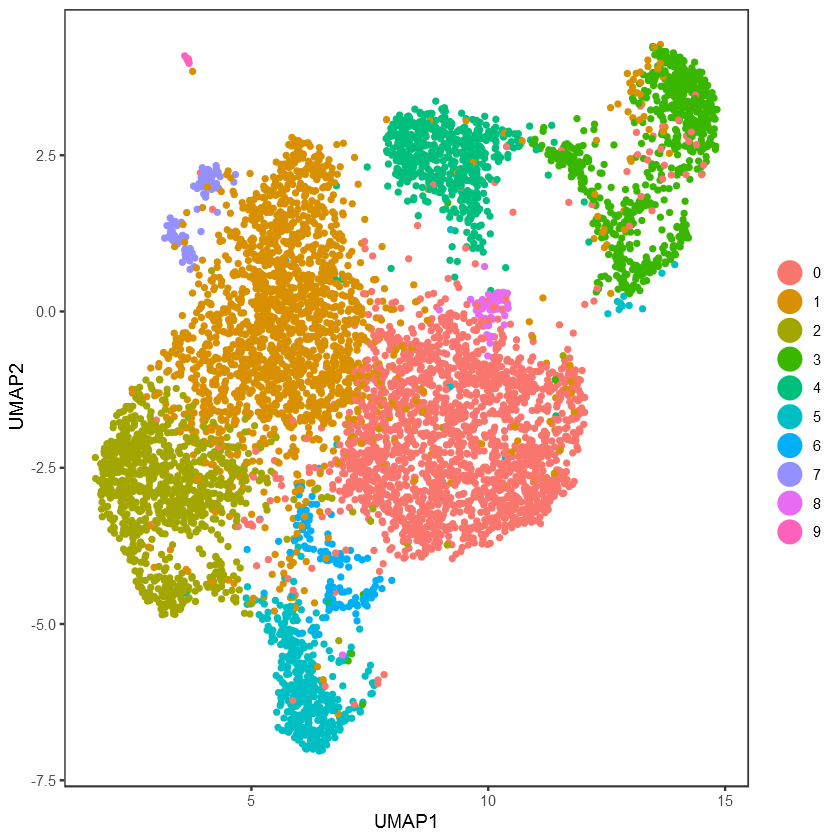

In [12]:
tcells_sub = FindClusters(tcells_sub, dims.use = 1:20, resolution = .4, print.output = FALSE, force.recalc = TRUE)
DimPlot(tcells_sub, 'umap')

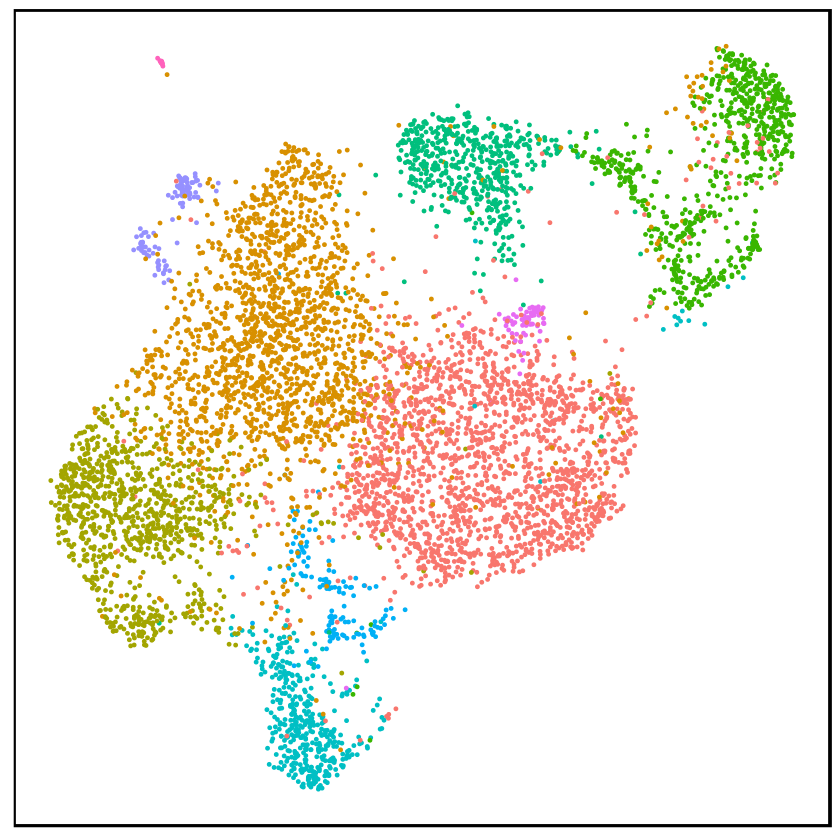

In [13]:
tcells_sub = addUMAP(tcells_sub)
ggplot(tcells_sub@meta.data, aes(x = UMAP1, y = UMAP2, color = res.0.4)) + geom_point(size = 0.3) + UMAP_theme
#ggsave('atopic_derm_umap.pdf', height = 2, width = 2, useDingbats = FALSE)

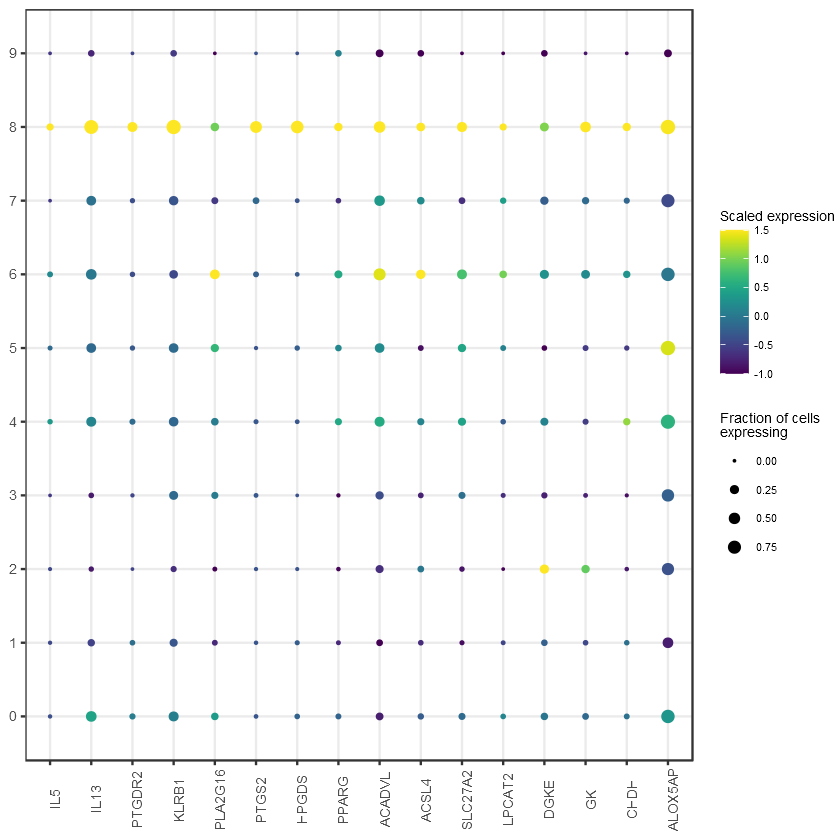

In [15]:
source("L:/Duncan/eoepaper/functions.R")
genes = c('IL5', 'IL13', 'PTGDR2', 'KLRB1','PLA2G16', 'PTGS2',  'HPGDS','PPARG','ACADVL', 'ACSL4','SLC27A2', 'LPCAT2','DGKE', 'GK','CHDH', 'ALOX5AP')
# Panel 3: phenotype of eosinophils and neutrophils
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}

data = as.data.frame(t(as.matrix(tcells_sub@data[genes,])))
data$phenotype = tcells_sub@meta.data$res.0.4
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
keep = df_exp
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1.5] = 1.5
df_exp$value[df_exp$value < -1]= -1
df_exp$pct = df_pct$value
df_exp$value = as.vector(df_exp$value)
#df_exp$value[is.nan(df_exp$value)] = 0

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 

 theme_bw()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + 
labs(color = "Scaled expression", size = 'Fraction of cells\nexpressing') + scale_x_discrete(limits = genes) + Axis_themes + 
theme(axis.title = element_blank(), axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8))+ 
 scale_size_continuous(range = c(0, 3))
ggsave('/braga_dots.pdf', useDingbats = FALSE, height = 3.2, width = 3.5 )